In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

/Users/purzelrakete/src/github.com/feldberlin/wavenet


In [2]:
import os

import numpy as np
import torch
import librosa
from torch.nn import functional as F
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

from wavenet import model, train, sample, audio, datasets, utils, viz

In [3]:
dry = False
if dry:
    os.environ['WANDB_MODE'] = 'dryrun'

In [7]:
p = model.HParams(n_audio_chans=2)
X, X_test = datasets.tracks('data/aria.wav', 0.2, p)
X[:].shape

(466, 2, 16000)

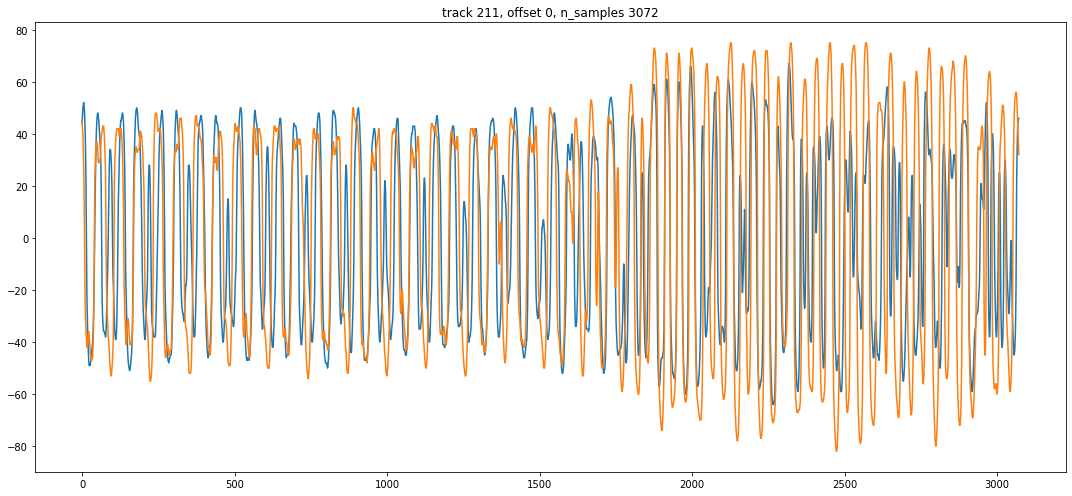

In [10]:
track_i = viz.plot_track(X[:], n_samples=p.receptive_field_size())

In [5]:
m = model.Wavenet(p)
t = train.Trainer(m, X, X_test, train.HParams(max_epochs=10, batch_size=8, num_workers=8, finder=True), None)

In [7]:
ipd.Audio(audio.mu_expand(X[track_i][:p.receptive_field_size()], p), rate=p.sampling_rate)

In [8]:
t.train()

wandb: Currently logged in as: purzelrakete (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.11 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


  0%|          | 0/59 [00:00<?, ?it/s]/home/purzelrakete/src/github.com/feldberlin/wavenet/.venv/lib/python3.7/site-packages/torch/nn/parallel/_functions.py:61: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
10:58 loss nan lr 1.539016e+04: 100%|██████████| 59/59 [01:09<00:00,  1.18s/it]
